# Final CO2 Project 
## Julie Cwidak, Luca Hess, Nicolas Vogel, Simon Schmid

# 1. Introduction 
The prediction of accident locations and their severity is a relevant and practical challenge that can be addressed using machine learning methods. In view of the constant urbanisation and the increase in road traffic, the identification of potential accident hotspots in urban areas is of considerable importance.

For this project, the dataset ‘Police-registered traffic accidents in the city of Zurich since 2011’ is used, which provides detailed information on road traffic accidents in Zurich. This dataset contains attributes such as the accident location, the time of the accident (year, month, day of the week, hour), the road type, the accident type, the accident involvement, the accident severity category and more. The focus here is on relevant features such as RoadType, Accident Month, Weekday and Time, as well as the type of paries involved in the accident.

Initially, our group wanted to develop a prediction model that identifies accident black spots spatially and temporally. However, after the first data analyses, it turned out that the necessary correlation of the data for solving the mentioned problem is not given. However, more on this in the discussion of the work.

As a result, we decided to shift the focus to the severity of the incidents. Such models not only have the potential to contribute to accident prevention, but also to recognise critical locations and time periods in cities at an early stage. This means that measures such as targeted budgeting for infrastructure improvements or the preventive planning of resources by the police and emergency services can be organised more effectively. In addition, driving schools and preventive education programmes can highlight specific danger spots and thus further improve road safety.

As early as 2005, a study was carried out using machine learning to develop a model that could predict the severity of injuries in road accidents. Factors such as driver characteristics, road conditions and environmental factors were taken into account.
A model was successfully implemented. Using a hybrid method consisting of decision trees and neural networks, a high level of accuracy was achieved, especially for injury classes such as ‘serious’ and ‘fatal’(Chong, Abraham & Paprzycki, 2005).

In a study conducted by the ZHAW, a standardised method was developed to evaluate the development of accident figures over time and to analyse the effectiveness of road safety measures. Among other things, accident trends, statistical significance and their effects were analysed.Statistical models based on negative binomial regression were successfully implemented. With the help of an early warning system and an impact analysis, a precise assessment of accident trends and the effectiveness of measures was achieved, which significantly supported road safety work. However, no machine learning was used; the focus was exclusively on classic statistical approaches (ZHAW, n.d.)

In April last year (2024), a study was published that developed a model for predicting the severity of injuries in road accidents. Using machine learning and transfer learning techniques, in particular the MobileNet model, an exceptionally high accuracy of 98.17% was achieved. The SHAP technique also made it possible to transparently analyse the most important influencing factors, such as road categories, weather conditions and drug use.
The study provides valuable insights for the improvement of accident prevention strategies and lays a foundation for future research in the field of road safety (Aboulola, 2024).

The need for innovative approaches to traffic accident analysis is great, as further studies show. Sharma and Usha (2023) investigated the effectiveness of algorithms such as Random Forest and SVM, while Behboudi et al. (2024) analysed 191 studies on accident prediction in a comprehensive review. Hemalatha and Dhuwaraganath (2024) focused on the prediction of accidents taking into account factors such as road conditions and weather. This work illustrates the potential of modern technologies for road safety research.

By developing a model based on the selected dataset and using the methods discussed in the course, this project will not only contribute to the practical application of machine learning methods, but also create a basis for further research and applications in the field of urban traffic planning.

# 2. Data Exploration and Preprocessing

In this section the data is loaded and explored. The data is preprocessed and transformed into a format that can be used for the machine learning models.
This includes:
* Loading the data from the csv file and loading python libraries
* Exploring Target and Features
    * Checking for missing values
    * Exploring the target, number of accidents by accident types
    * Exploring the features
        * Number of accidents by type and day of the week
        * Number of accidents by type and hour of the day
        * Number of accidents by type and month
        * Number of accidents by type and road type
* Encoding Ordinal and Categorical Features

## 2.1 Import Libraries and Load Data

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

# Load the data
data = pd.read_csv('roadtrafficaccidentlocations.csv')
data.head() 




,AccidentUID,AccidentType,AccidentType_de,AccidentType_fr,AccidentType_it,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_de,AccidentSeverityCategory_fr,AccidentSeverityCategory_it,...,AccidentMonth_fr,AccidentMonth_it,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_de,AccidentWeekDay_fr,AccidentWeekDay_it,AccidentWeekDay_en,AccidentHour,AccidentHour_text
0,9FC221265B5EE0F0E0430A865E33E0F0,at0,Schleuder- oder Selbstunfall,dérapage ou perte de maîtrise,Incidente di sbandamento o per colpa propria,Accident with skidding or self-accident,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw405,Freitag,vendredi,Venerdì,Friday,8,08h-09h
1,9FC221265E13E0F0E0430A865E33E0F0,at7,Parkierunfall,accident en parquant,Incidente nel parcheggiare,Accident when parking,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw406,Samstag,samedi,Sabato,Saturday,17,17h-18h
2,9FC22126601FE0F0E0430A865E33E0F0,at3,Abbiegeunfall,accident en quittant une route,Incidente nello svoltare,Accident when turning left or right,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw404,Donnerstag,jeudi,Giovedì,Thursday,10,10h-11h
3,9FC22126614DE0F0E0430A865E33E0F0,at2,Auffahrunfall,accident par tamponnement,Incidente di tamponamento,Accident with rear-end collision,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw404,Donnerstag,jeudi,Giovedì,Thursday,13,13h-14h
4,9FC2212663A3E0F0E0430A865E33E0F0,at7,Parkierunfall,accident en parquant,Incidente nel parcheggiare,Accident when parking,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw403,Mittwoch,mercredi,Mercoledì,Wednesday,10,10h-11h


## 2.2 Feature Selection and Target Definition
The Data contains a lot of columns. We are only interested in the following columns as features:
* AccidentType_en
* RoadType_en
* AccidentMonth
* AccidentWeekDay_en
* AccidentHour
* AccidentInvolvedPederastrian
* AccidentInvolvedBicycle
* AccidentInvolvedMotorcycle

The target variable will be: 
* AccidentSeverityCategory_en

In [2]:
# Selecting the columns we are interested in
data = data[['AccidentSeverityCategory_en', 'AccidentType_en', 'AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle',
       'AccidentInvolvingMotorcycle', 'RoadType_en', 'AccidentMonth', 'AccidentWeekDay_en', 'AccidentHour']]
data.head(3000)

,AccidentSeverityCategory_en,AccidentType_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType_en,AccidentMonth,AccidentWeekDay_en,AccidentHour
0,Accident with property damage,Accident with skidding or self-accident,False,False,False,Minor road,1,Friday,8
1,Accident with property damage,Accident when parking,False,False,False,Minor road,1,Saturday,17
2,Accident with property damage,Accident when turning left or right,False,False,False,Minor road,1,Thursday,10
3,Accident with property damage,Accident with rear-end collision,False,False,False,Principal road,1,Thursday,13
4,Accident with property damage,Accident when parking,False,False,False,Other,1,Wednesday,10
...,...,...,...,...,...,...,...,...,...
2995,Accident with severe injuries,Accident with rear-end collision,False,True,False,Minor road,4,Wednesday,9
2996,Accident with light injuries,Accident involving pedestrian(s),True,False,False,Minor road,4,Sunday,2
2997,Accident with property damage,Accident with skidding or self-accident,False,False,False,Principal road,3,Thursday,15
2998,Accident with light injuries,Accident with skidding or self-accident,False,True,False,Principal road,6,Sunday,3


## 2.3 Missing Values

Checking for missing values

In [3]:
for col in data.columns:
    print(col, data[col].isnull().sum())


AccidentSeverityCategory_en 0
AccidentType_en 0
AccidentInvolvingPedestrian 0
AccidentInvolvingBicycle 0
AccidentInvolvingMotorcycle 0
RoadType_en 0
AccidentMonth 0
AccidentWeekDay_en 0
AccidentHour 0


No missing values detected. It can be proceeded without further actions.

## 2.4 Target Exploration

First, the target variable is examined. This is done by plotting the number of acciedents by type. 

Text(0.5, 1.0, 'Number of Accidents by Severity')

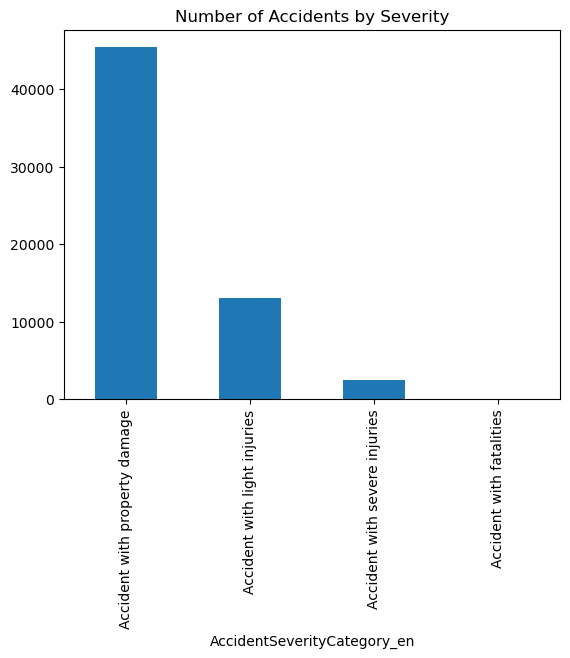

In [4]:
# Number of Accidents by Severity
data['AccidentSeverityCategory_en'].value_counts().plot(kind='bar')
plt.title('Number of Accidents by Severity')


The data looks a little unbalanced. As there are many observations, this should not be a problem. 
It can be seen that serious accidents are those with property damage. Accidents with minor injuries are about three times less frequent. Accidents with serious injuries or fatalities are less common.

In [5]:
# Number of Accidents of each accident type
data['AccidentSeverityCategory_en'].value_counts()


AccidentSeverityCategory_en
Accident with property damage    45427
Accident with light injuries     13006
Accident with severe injuries     2540
Accident with fatalities            85
Name: count, dtype: int64

## 2.5 Feature and target Exploration
### 2.5.1 Number of Accidents Severity and Day of the Week

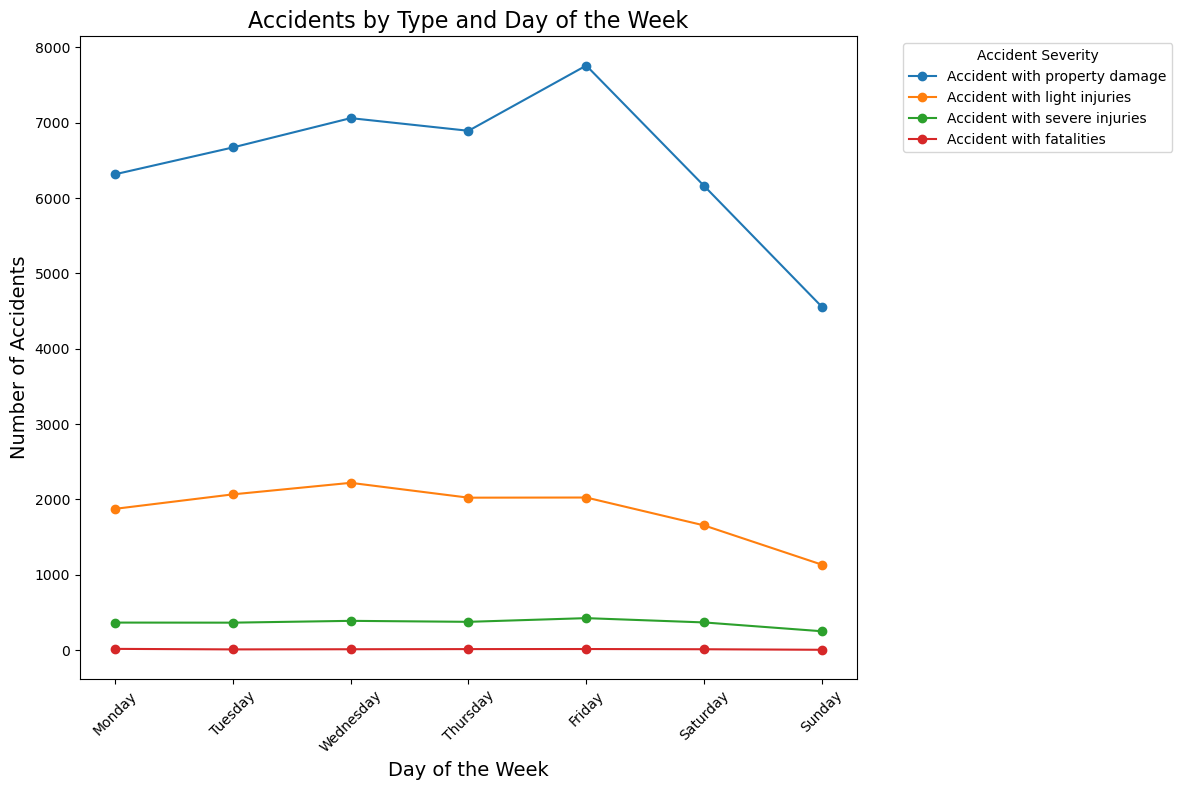

In [6]:
# numer of accidents by accident type and day of the week
# extracting the data
accidents_per_day = {}
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for AccidentDay in data['AccidentWeekDay_en'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['AccidentWeekDay_en'] == AccidentDay)
        ].shape[0]
        counts.append(count)
    accidents_per_day[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
columns = data['AccidentWeekDay_en'].unique() 
result_df = pd.DataFrame.from_dict(accidents_per_day, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot
plt.title('Accidents by Type and Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
    
        

The number of accidents is fairly constant throughout the week.
The number of accidents is lower at weekends than on weekdays. However, there is an increase in accidents involving property damage on Fridays. 

### 2.5.2 Number of Accidents by Severity and Hour of the Day


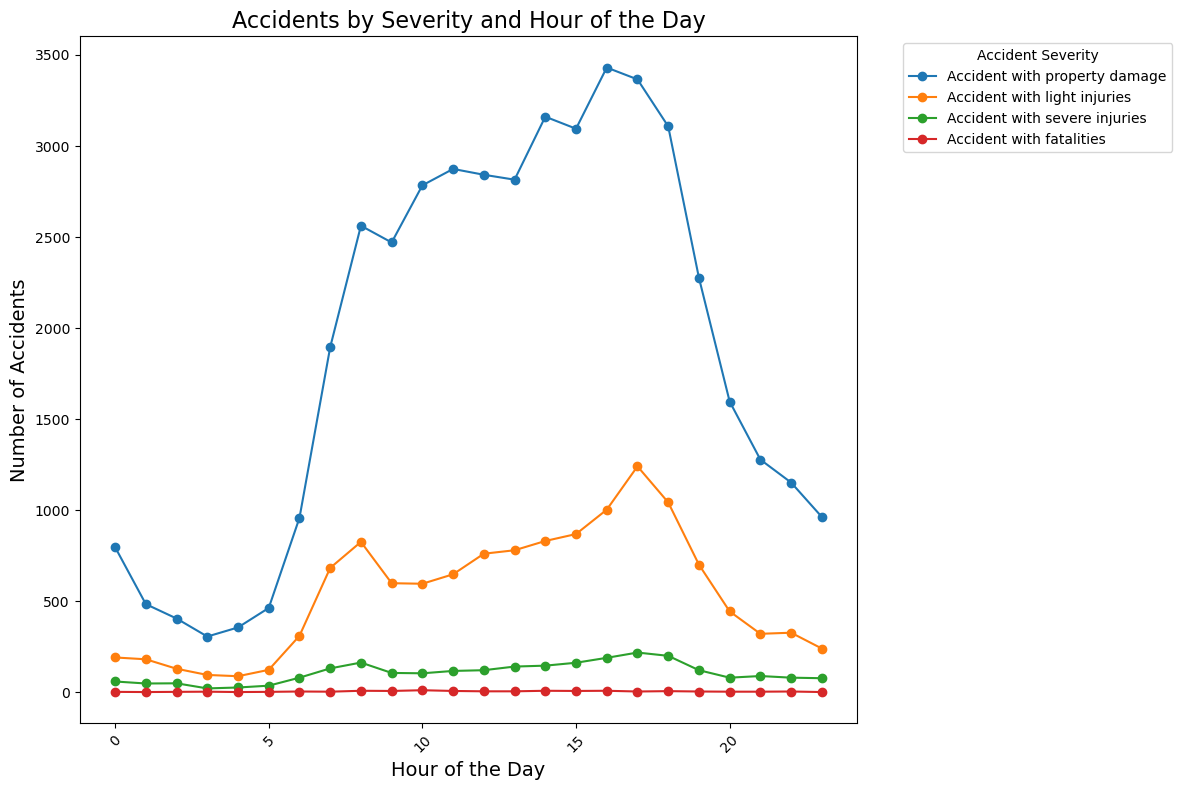

In [7]:
# numer of accidents by accident severity and hour of the day
# extracting the data
accidents_per_hour = {}
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for AccidentHour in data['AccidentHour'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['AccidentHour'] == AccidentHour)
        ].shape[0]
        counts.append(count)
    accidents_per_hour[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
columns = data['AccidentHour'].unique()  
result_df = pd.DataFrame.from_dict(accidents_per_hour, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot
plt.title('Accidents by Severity and Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The number of accidents is the lowest between 00:00-5:00. The number of accidents is the highest between 16:00-18:00.
There is a tendency for the number of accidents to increase in the afternoon and evening. 

### 2.5.3 Number of Accidents by Severity and Month

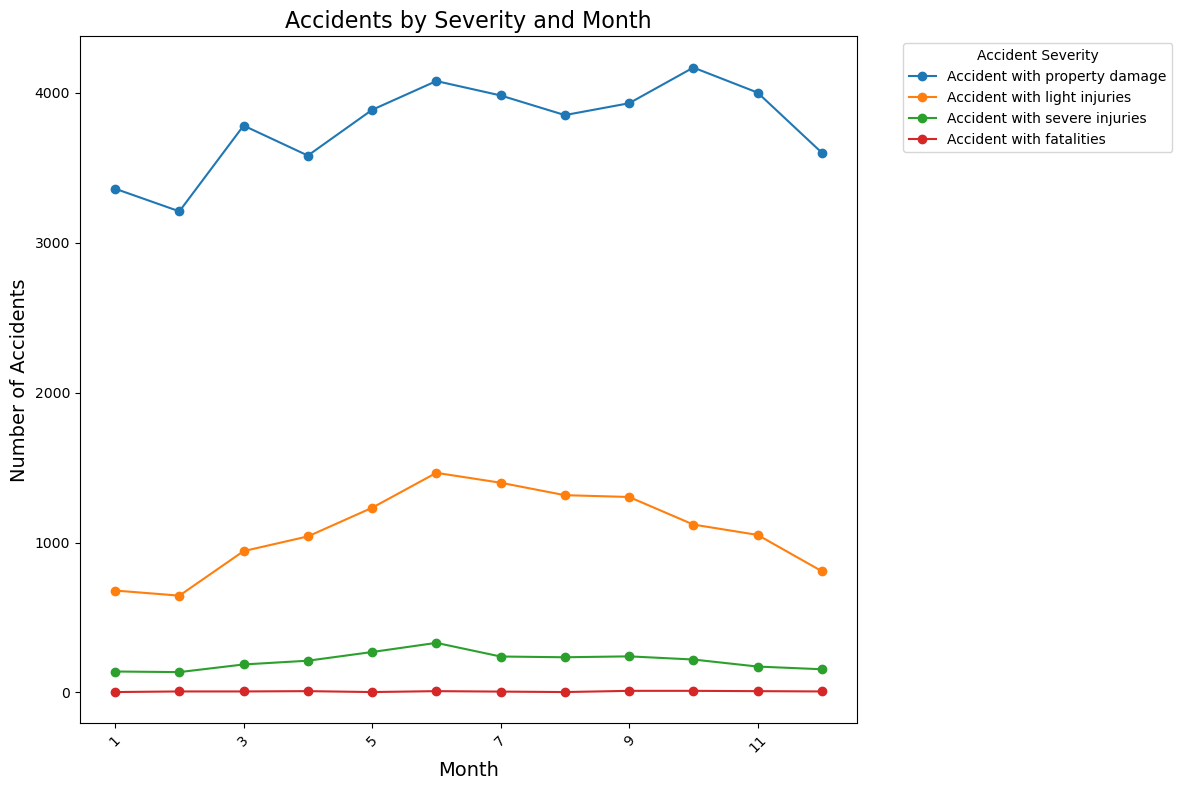

In [8]:
# numer of accidents by accident severity and month
# extracting the data
accidents_per_month = {}
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for AccidentMonth in data['AccidentMonth'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['AccidentMonth'] == AccidentMonth)
        ].shape[0]
        counts.append(count)
    accidents_per_month[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
columns = data['AccidentMonth'].unique()
result_df = pd.DataFrame.from_dict(accidents_per_month, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot

plt.title('Accidents by Severity and Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The number of accidents seems to be lower in the winter months. The number of accidents is slightly higher in the summer months. The difference is not very pronounced. 

### 2.5.4 Number of Accidents by Severity and Road Type

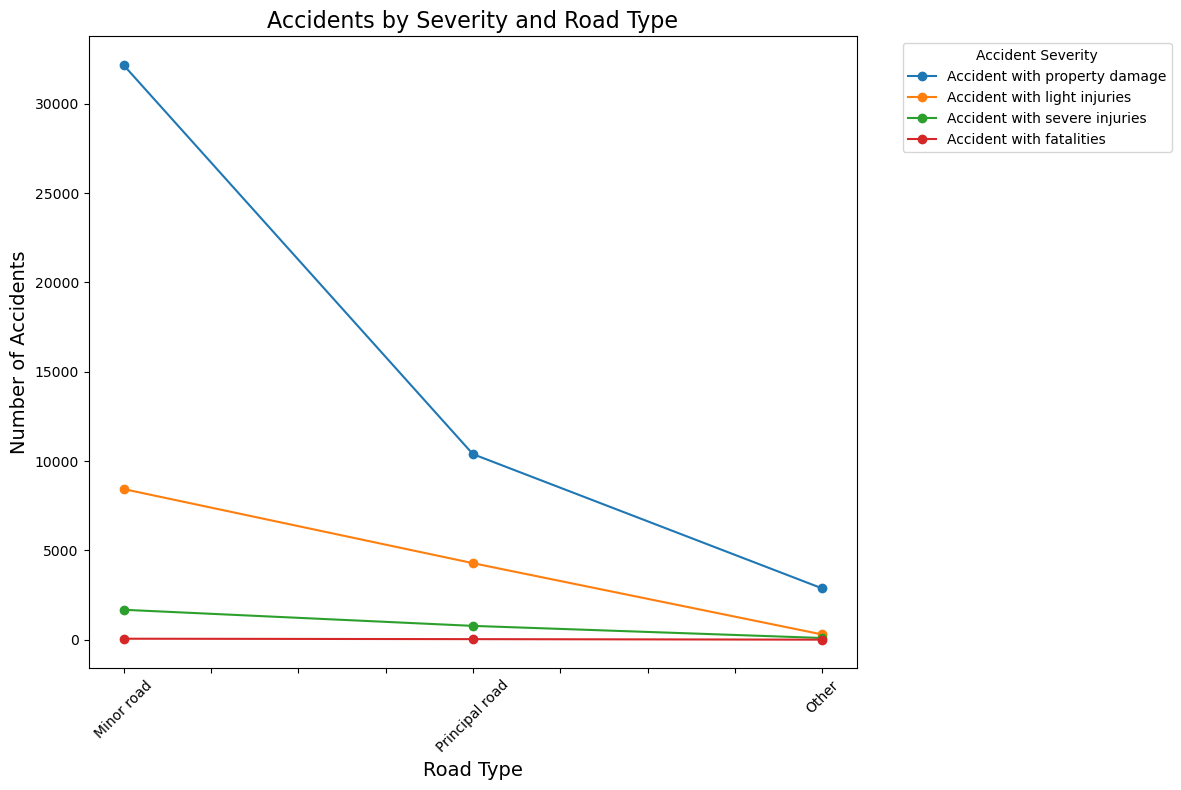

In [9]:
# numer of accidents by accident severity and road type
# extracting the data
accidents_per_road = {}

for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for RoadType in data['RoadType_en'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['RoadType_en'] == RoadType)
        ].shape[0]
        counts.append(count)
    accidents_per_road[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = ['Minor road', 'Principal road', 'Other']
columns = data['RoadType_en'].unique()
result_df = pd.DataFrame.from_dict(accidents_per_road, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot
plt.title('Accidents by Severity and Road Type', fontsize=16)
plt.xlabel('Road Type', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
    
plt.show()



There are more accidents on minor roads than on principal roads. 
## 2.5.5 Number of Accidents by Severity and Type

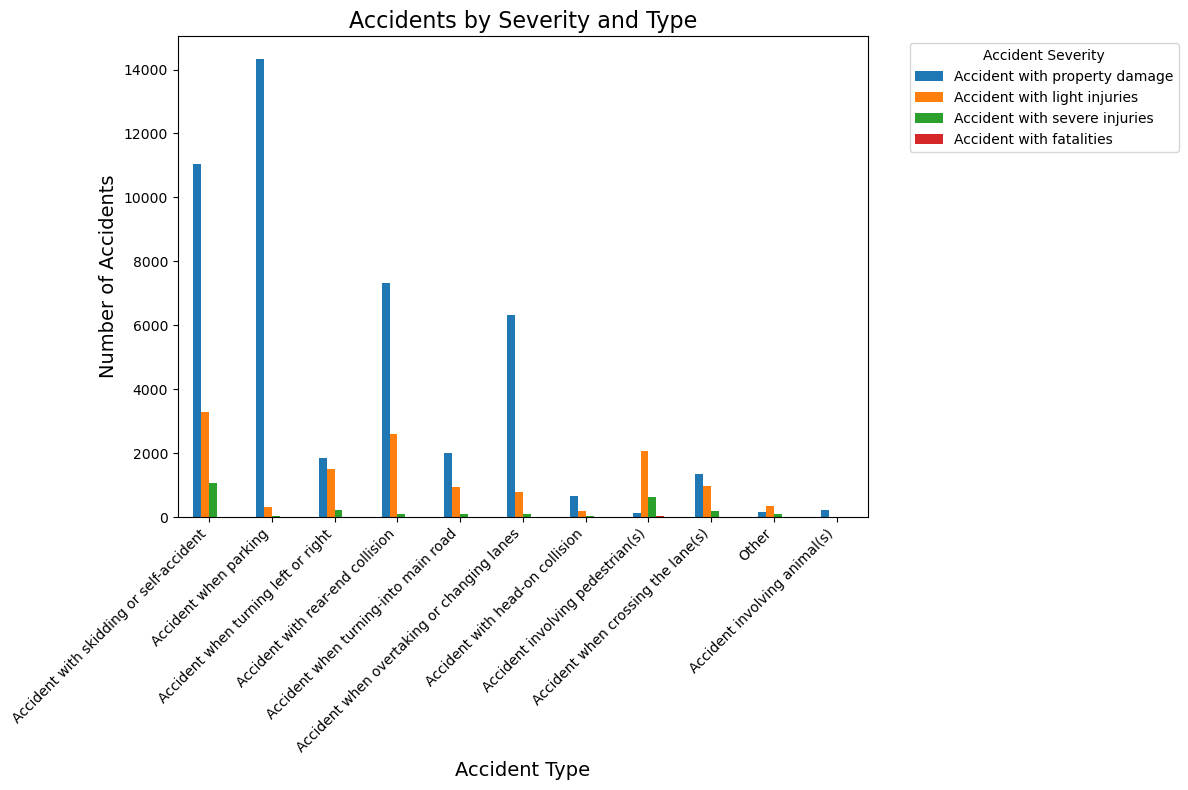

In [10]:
# numer of accidents by accident severity and day of the week
# extracting the data
accidents_per_type = {}
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for AccidentType in data['AccidentType_en'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['AccidentType_en'] == AccidentType)
        ].shape[0]
        counts.append(count)
    accidents_per_type[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order =  data['AccidentType_en'].unique()
columns =  data['AccidentType_en'].unique()
result_df = pd.DataFrame.from_dict(accidents_per_type, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='bar', figsize=(12, 8))

# Customize the plot
plt.title('Accidents by Severity and Type', fontsize=16)
plt.xlabel('Accident Type', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()
    

Accidents with property damage are often caused by skidding, parking or changing lanes/overtaking. 

Light injuries occur in rear-end collisions, accidents with pedestrians, skidding or self-accidents.

Severe injuries are also caused by skidding and pedestrian accidents. 

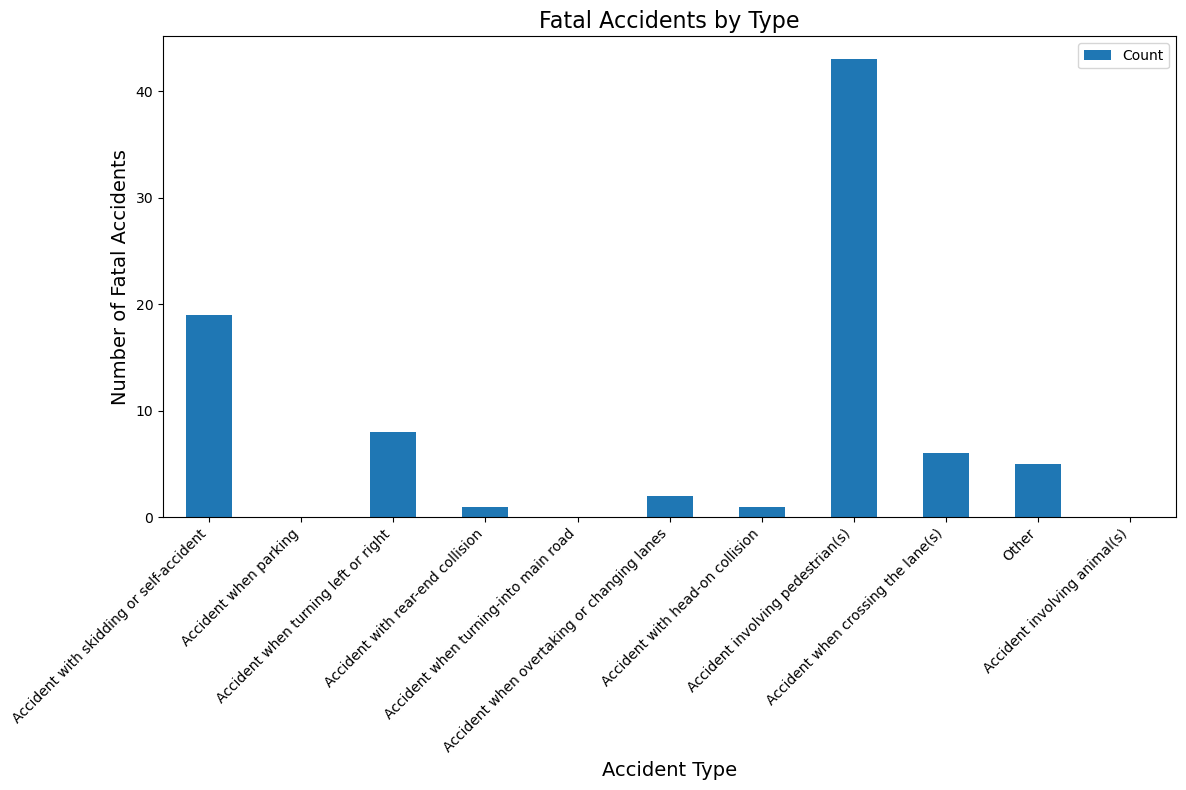

In [11]:
# Number of Accidents by Type and Fatalities
# Filter the data to include only accidents with fatalities
fatal_accidents = data[data['AccidentSeverityCategory_en'] == 'Accident with fatalities']

# Extracting the data
accidents_per_type = {}
for AccidentType in fatal_accidents['AccidentType_en'].unique():
    count = fatal_accidents[fatal_accidents['AccidentType_en'] == AccidentType].shape[0]
    accidents_per_type[AccidentType] = count

# Create a pandas DataFrame from the extracted data
result_df = pd.DataFrame(list(accidents_per_type.items()), columns=['AccidentType', 'Count'])

# Ensure the order is the same as in the other plot
desired_order = data['AccidentType_en'].unique()
result_df = result_df.set_index('AccidentType').reindex(desired_order).reset_index()

# Plot the data
result_df.set_index('AccidentType').plot(kind='bar', figsize=(12, 8))

# Customize the plot
plt.title('Fatal Accidents by Type', fontsize=16)
plt.xlabel('Accident Type', fontsize=14)
plt.ylabel('Number of Fatal Accidents', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


The number of accidents with fatalities is quite low. Most of the accidents with fatalities occur in accidents involving pedestrians. 

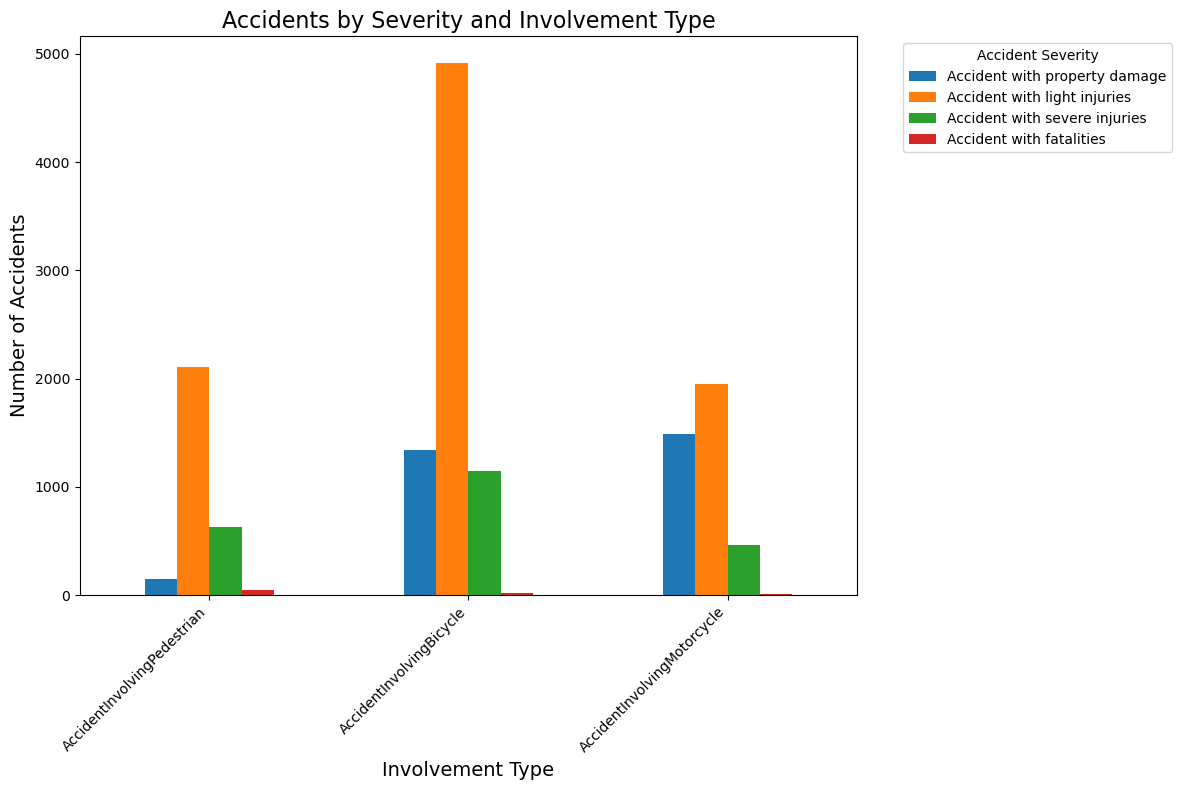

In [12]:
# numer of accidents by accident severity and Involvement of others
# extracting the data
accidents_per_involvement = {} 
involvement_columns = ['AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle', 'AccidentInvolvingMotorcycle'] 
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique(): 
    counts = [] 
    for Involvement in involvement_columns: 
        count = data.loc[ (data['AccidentSeverityCategory_en'] == AccidentSeverity) & (data[Involvement] == True) ].shape[0] 
        counts.append(count) 
        accidents_per_involvement[AccidentSeverity] = counts 
        
# Create a pandas DataFrame from the extracted data 
        
columns = involvement_columns 
result_df = pd.DataFrame.from_dict(accidents_per_involvement, orient='index', columns=columns) 

result_df.reset_index(inplace=True) 
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True) 

# Plot the data 
result_df.T.plot(kind='bar', figsize=(12, 8)) 

# Customize the plot 
plt.title('Accidents by Severity and Involvement Type', fontsize=16) 
plt.xlabel('Involvement Type', fontsize=14) 
plt.ylabel('Number of Accidents', fontsize=14) 
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.xticks(rotation=45, ha='right') 

plt.tight_layout() 
plt.show()

## 2.6 Encoding
The data needs to be tranformed into numerical values. 
The first step is to check the columns for unique values. 

In [13]:
# Check the unique values of the columns
for col in data.columns:
    print(col, data[col].unique())

AccidentSeverityCategory_en ['Accident with property damage' 'Accident with light injuries'
 'Accident with severe injuries' 'Accident with fatalities']
AccidentType_en ['Accident with skidding or self-accident' 'Accident when parking'
 'Accident when turning left or right' 'Accident with rear-end collision'
 'Accident when turning-into main road'
 'Accident when overtaking or changing lanes'
 'Accident with head-on collision' 'Accident involving pedestrian(s)'
 'Accident when crossing the lane(s)' 'Other'
 'Accident involving animal(s)']
AccidentInvolvingPedestrian [False  True]
AccidentInvolvingBicycle [False  True]
AccidentInvolvingMotorcycle [False  True]
RoadType_en ['Minor road' 'Principal road' 'Other']
AccidentMonth [ 1  2  3  4  5  6  7  8  9 10 11 12]
AccidentWeekDay_en ['Friday' 'Saturday' 'Thursday' 'Wednesday' 'Monday' 'Tuesday' 'Sunday']
AccidentHour [ 8 17 10 13 14  7  9 12 19 23 16  4 11 18 15  1  2 20  0  6 21  5 22  3]


Now the data has to be transformed into numerical values. 
* AccidentSeverity_en --> OrdinalEncoding (has hierarchical order)
* AccidentType_en --> OneHotEncoding
* RoadType_en --> OneHotEncoding
* AccidentMonth --> TrigonometricEncoding (Cyclic pattern)
* AccidentWeekDay_en --> OrdinalEncoding then TrigonometricEncoding (Cyclic pattern)
* AccidentHour --> TrigonometricEncoding (Cycle pattern)
* AccidentInvolvingPedestrian --> Boolean
* AccidentInvolvingBicycle --> Boolean
* AccidentInvolvingMotorcycle --> Boolean

The encoding of RoadType_en will be done with OneHotEncoding, because we didn't want to introduce a ranking of the different road types. This procedure is suitable for the planned models kNN, RandomForest and SVM. Unfortunately it increases the dimensionality of the data.
Alternatively we could use OrdinalEncoding  which would have been quite straightforward. This would include a ranking of the different road types.

The encoding of AccidentWeekDay_en will be done with OrdinalEncoding. This is simple and efficient. A disadvantage is that a possible cyclic pattern will not be considered. 
To ensure that the cyclic pattern is taken into account, we could use a CyclicEncoding. This would be more complex and is not implemented here.
## 2.6.1 Encoding of AccidentSeverityCategory_en, OrdinalEncoding

In [14]:
# Transform the data
# to check the transformation a new empty dataframe is created, where the transformed data will be stored
data_transformed = pd.DataFrame()

# Order of categories for AccidentSeverityCategory_en
categories_order = [['Accident with property damage','Accident with light injuries', 'Accident with severe injuries', 'Accident with fatalities']]

# OrdinalEncoding for AccidentSeverityCategory_en
OrdEN_Label = preprocessing.OrdinalEncoder(categories=categories_order)
# define the index to introduce a hierarchical order

# fit and transform the data   
data_transformed['AccidentSeverityCategory_en'] = OrdEN_Label.fit_transform(data['AccidentSeverityCategory_en'].values.reshape(-1,1)).flatten()

# check the transformed column against the original column
data_transformed['AccidentSeverityCategory_en'].unique(), data['AccidentSeverityCategory_en'].unique()


(array([0., 1., 2., 3.]),
 array(['Accident with property damage', 'Accident with light injuries',
        'Accident with severe injuries', 'Accident with fatalities'],
       dtype=object))

## 2.6.2 Encoding of AccidentType_en, OneHotEncoding

In [15]:
# OneHotEncoding for AccidentType_en
OHE = preprocessing.OneHotEncoder()

OHE_AccidentType_en = data['AccidentType_en'].values.reshape(-1,1)
OHE_AccidentType_en = OHE.fit_transform(OHE_AccidentType_en).toarray()

# Delete AccidentType_en from pandas DataFrame and add the new columns from the OneHotEncoding
data_transformed = pd.concat([data_transformed, pd.DataFrame(OHE_AccidentType_en, columns=['Accident involving animal(s)', 
                                                                                           'Accident involving pedestrian(s)',
                                                                                           'Accident when crossing the lane(s)',
                                                                                           'Accident when overtaking or changing lanes', 
                                                                                           'Accident when parking', 
                                                                                           'Accident when turning left or right', 
                                                                                           'Accident when turning-into main road',
                                                                                           'Accident with head-on collision',
                                                                                           'Accident with rear-end collision',
                                                                                           'Accident with skidding or self-accident',
                                                                                           'Other'])], axis=1)

# check the transformed column against the original column
(data_transformed[[                                                                        'Accident with skidding or self-accident', 
                                                                                           'Accident when parking',
                                                                                           'Accident when turning left or right',
                                                                                           'Accident with rear-end collision', 
                                                                                           'Accident when turning-into main road', 
                                                                                           'Accident when overtaking or changing lanes', 
                                                                                           'Accident with head-on collision',
                                                                                           'Accident involving pedestrian(s)',
                                                                                           'Accident when crossing the lane(s)',
                                                                                           'Other',
                                                                                           'Accident involving animal(s)']].head(10)), data['AccidentType_en'].head(10)

(   Accident with skidding or self-accident  Accident when parking  \
 0                                      1.0                    0.0   
 1                                      0.0                    1.0   
 2                                      0.0                    0.0   
 3                                      0.0                    0.0   
 4                                      0.0                    1.0   
 5                                      0.0                    0.0   
 6                                      0.0                    0.0   
 7                                      0.0                    0.0   
 8                                      0.0                    0.0   
 9                                      0.0                    1.0   
 
    Accident when turning left or right  Accident with rear-end collision  \
 0                                  0.0                               0.0   
 1                                  0.0                               0.0 

## 2.6.3 Encoding of RoadType_en, OneHotEncoding

In [16]:


# OneHotEncoding for RoadType_en
OHE = preprocessing.OneHotEncoder()
OHE_RoadType_en = data['RoadType_en'].values.reshape(-1,1)
OHE_RoadType_en = OHE.fit_transform(OHE_RoadType_en).toarray()

# Add the new columns from the OneHotEncoding
data_transformed = pd.concat([data_transformed, pd.DataFrame(OHE_RoadType_en, columns=['Minor road', 'Other road type', 'Principal road'])], axis=1)

# show the three columns of the transformed data
data_transformed[['Minor road', 'Principal road', 'Other road type']].head(10), data['RoadType_en'].head(10)


(   Minor road  Principal road  Other road type
 0         1.0             0.0              0.0
 1         1.0             0.0              0.0
 2         1.0             0.0              0.0
 3         0.0             1.0              0.0
 4         0.0             0.0              1.0
 5         1.0             0.0              0.0
 6         1.0             0.0              0.0
 7         0.0             1.0              0.0
 8         1.0             0.0              0.0
 9         1.0             0.0              0.0,
 0        Minor road
 1        Minor road
 2        Minor road
 3    Principal road
 4             Other
 5        Minor road
 6        Minor road
 7    Principal road
 8        Minor road
 9        Minor road
 Name: RoadType_en, dtype: object)

## 2.6.4 Encoding of AccidentMonth, TrigonometricEncoding

In [17]:
# Trigonometric encoding
data_transformed['AccidentMonth_sin'] = np.sin(2 * np.pi * data['AccidentMonth'] / 12)
data_transformed['AccidentMonth_cos'] = np.cos(2 * np.pi * data['AccidentMonth'] / 12)

# check the transformed column against the original column
data_transformed[['AccidentMonth_sin', 'AccidentMonth_cos']][:10], data['AccidentMonth'][:10]

(   AccidentMonth_sin  AccidentMonth_cos
 0                0.5           0.866025
 1                0.5           0.866025
 2                0.5           0.866025
 3                0.5           0.866025
 4                0.5           0.866025
 5                0.5           0.866025
 6                0.5           0.866025
 7                0.5           0.866025
 8                0.5           0.866025
 9                0.5           0.866025,
 0    1
 1    1
 2    1
 3    1
 4    1
 5    1
 6    1
 7    1
 8    1
 9    1
 Name: AccidentMonth, dtype: int64)

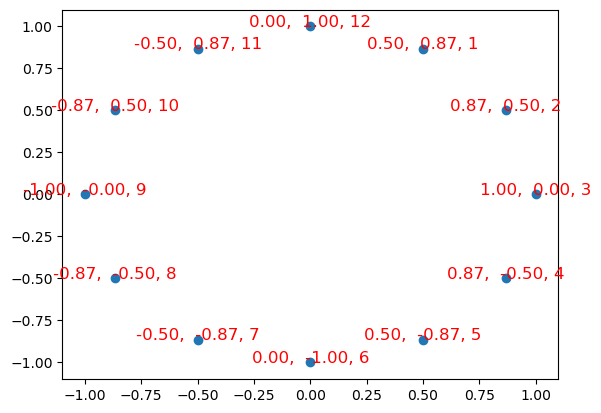

In [18]:
# Visualisation of the Trigonometric Encoding to map the months to the points in the circle
def calc_sin_cos(point, max_points):
    sin = np.sin(2 * np.pi * point / max_points)
    cos = np.cos(2 * np.pi * point / max_points)
    return sin, cos

sinus = []
cosinus = []

for i in range(12):
    sin, cos = calc_sin_cos(i, 12)
    sinus.append(sin)
    cosinus.append(cos)
    
fig, ax = plt.subplots()
ax.scatter(sinus, cosinus)

month = 12
for sin, cos in zip(sinus, cosinus):
    text = f"{sin:.2f},  {cos:.2f}, {month}"
    ax.text(sin, cos, text, fontsize=12, ha='center', color = 'red')
    month +=1
    if month > 12:
        month = 1
    
plt.show()

# 1 = January, 2 = February, 3 = March, 4 = April, 5 = May, 6 = June, 7 = July, 8 = August, 9 = September, 10 = October, 11 = November, 12 = December


## 2.6.5 Encoding of AccidentWeekDay_en, OrdinalEncoding and TrigonometricEncoding

In [19]:
# Trigonometric Encoding for AccidentWeekDay_en
# Firstly Ordinal Encoding the days of the week
# Order of categories for AccidentWeekDay_en
categories_order = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# OrdinalEncoding for AccidentWeekDay_en
OrdEN_Weekdays = preprocessing.OrdinalEncoder(categories=categories_order)

# fit and transform the data
data_transformed['AccidentWeekDay_en'] = OrdEN_Weekdays.fit_transform(data['AccidentWeekDay_en'].values.reshape(-1,1)).flatten()

# check the transformed column against the original column
data_transformed['AccidentWeekDay_en'].unique(), data['AccidentWeekDay_en'].unique()


(array([4., 5., 3., 2., 0., 1., 6.]),
 array(['Friday', 'Saturday', 'Thursday', 'Wednesday', 'Monday', 'Tuesday',
        'Sunday'], dtype=object))

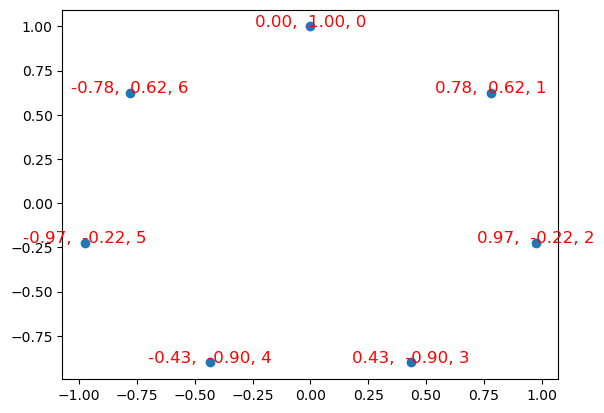

In [20]:
sinus = []
cosinus = []

for i in range(7):
    sin, cos = calc_sin_cos(i, 7)
    sinus.append(sin)
    cosinus.append(cos)
    
fig, ax = plt.subplots()
ax.scatter(sinus, cosinus)

weekday = 0
for sin, cos in zip(sinus, cosinus):
    text = f"{sin:.2f},  {cos:.2f}, {weekday}"
    ax.text(sin, cos, text, fontsize=12, ha='center', color = 'red')
    weekday +=1
    
plt.show()

# 0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday, 5 = Saturday, 6 = Sunday

In [21]:
data_transformed['AccidentWeekDay_sin'] = np.sin(2 * np.pi * data_transformed['AccidentWeekDay_en'] / 7)
data_transformed['AccidentWeekDay_cos'] = np.cos(2 * np.pi * data_transformed['AccidentWeekDay_en'] / 7)

# Drop the ordinal encoded column
data_transformed.drop('AccidentWeekDay_en', axis=1, inplace=True)

# check the transformed column against the original column
data_transformed[['AccidentWeekDay_sin', 'AccidentWeekDay_cos']][:10], data['AccidentWeekDay_en'][:10]

(   AccidentWeekDay_sin  AccidentWeekDay_cos
 0            -0.433884            -0.900969
 1            -0.974928            -0.222521
 2             0.433884            -0.900969
 3             0.433884            -0.900969
 4             0.974928            -0.222521
 5            -0.433884            -0.900969
 6             0.000000             1.000000
 7             0.433884            -0.900969
 8            -0.974928            -0.222521
 9             0.000000             1.000000,
 0       Friday
 1     Saturday
 2     Thursday
 3     Thursday
 4    Wednesday
 5       Friday
 6       Monday
 7     Thursday
 8     Saturday
 9       Monday
 Name: AccidentWeekDay_en, dtype: object)

## 2.6.6 Encoding of AccidentHour, TrigonometricEncoding

In [22]:
# Encoding AccidentHour, TrigonometricEncoding
data_transformed['AccidentHour_sin'] = np.sin(2 * np.pi * data['AccidentHour'] / 24)
data_transformed['AccidentHour_cos'] = np.cos(2 * np.pi * data['AccidentHour'] / 24)

# check the transformed column against the original column
data_transformed[['AccidentHour_sin', 'AccidentHour_cos']][:10], data['AccidentHour'][:10]


(   AccidentHour_sin  AccidentHour_cos
 0          0.866025         -0.500000
 1         -0.965926         -0.258819
 2          0.500000         -0.866025
 3         -0.258819         -0.965926
 4          0.500000         -0.866025
 5         -0.500000         -0.866025
 6          0.866025         -0.500000
 7          0.965926         -0.258819
 8          0.707107         -0.707107
 9         -0.258819         -0.965926,
 0     8
 1    17
 2    10
 3    13
 4    10
 5    14
 6     8
 7     7
 8     9
 9    13
 Name: AccidentHour, dtype: int64)

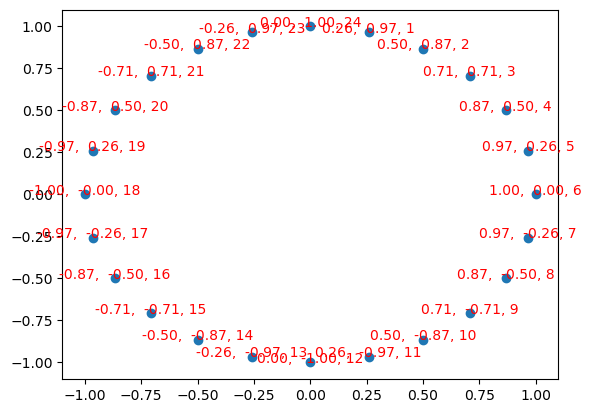

In [23]:
# Plot the Trigonometric Encoding to map the hours to the points
sinus = []
cosinus = []

for i in range(24):
    sin, cos = calc_sin_cos(i, 24)
    sinus.append(sin)
    cosinus.append(cos)
    
fig, ax = plt.subplots()
ax.scatter(sinus, cosinus)

hour = 24
for sin, cos in zip(sinus, cosinus):
    text = f"{sin:.2f},  {cos:.2f}, {hour}"
    ax.text(sin, cos, text, fontsize=10, ha='center', color = 'red')
    hour +=1
    if hour > 24:
        hour = 1
    
plt.show()


## 2.6.7 Encode AccidentInvolving(Pedestrians, Bicycle, Motorcycle), BooleanEncoding


In [24]:
# Adding the columns with the boolean values
data_transformed['AccidentInvolvingPedestrian'] = data['AccidentInvolvingPedestrian']
data_transformed['AccidentInvolvingBicycle'] = data['AccidentInvolvingBicycle']
data_transformed['AccidentInvolvingMotorcycle'] = data['AccidentInvolvingMotorcycle']

# change the entries to 0 and 1
data_transformed['AccidentInvolvingPedestrian'] = data_transformed['AccidentInvolvingPedestrian'].astype(int)
data_transformed['AccidentInvolvingBicycle'] = data_transformed['AccidentInvolvingBicycle'].astype(int)
data_transformed['AccidentInvolvingMotorcycle'] = data_transformed['AccidentInvolvingMotorcycle'].astype(int)

# Check the transformed data
data_transformed.head(20)

,AccidentSeverityCategory_en,Accident involving animal(s),Accident involving pedestrian(s),Accident when crossing the lane(s),Accident when overtaking or changing lanes,Accident when parking,Accident when turning left or right,Accident when turning-into main road,Accident with head-on collision,Accident with rear-end collision,...,Principal road,AccidentMonth_sin,AccidentMonth_cos,AccidentWeekDay_sin,AccidentWeekDay_cos,AccidentHour_sin,AccidentHour_cos,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,-0.433884,-0.900969,8.660254e-01,-0.500000,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,-0.974928,-0.222521,-9.659258e-01,-0.258819,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,0.433884,-0.900969,5.000000e-01,-0.866025,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.5,0.866025,0.433884,-0.900969,-2.588190e-01,-0.965926,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,0.974928,-0.222521,5.000000e-01,-0.866025,0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.5,0.866025,-0.433884,-0.900969,-5.000000e-01,-0.866025,0,0,0
6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,0.000000,1.000000,8.660254e-01,-0.500000,0,1,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.5,0.866025,0.433884,-0.900969,9.659258e-01,-0.258819,0,0,0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.5,0.866025,-0.974928,-0.222521,7.071068e-01,-0.707107,0,0,0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,0.000000,1.000000,-2.588190e-01,-0.965926,0,0,0


# 2.7 Correlation Plot

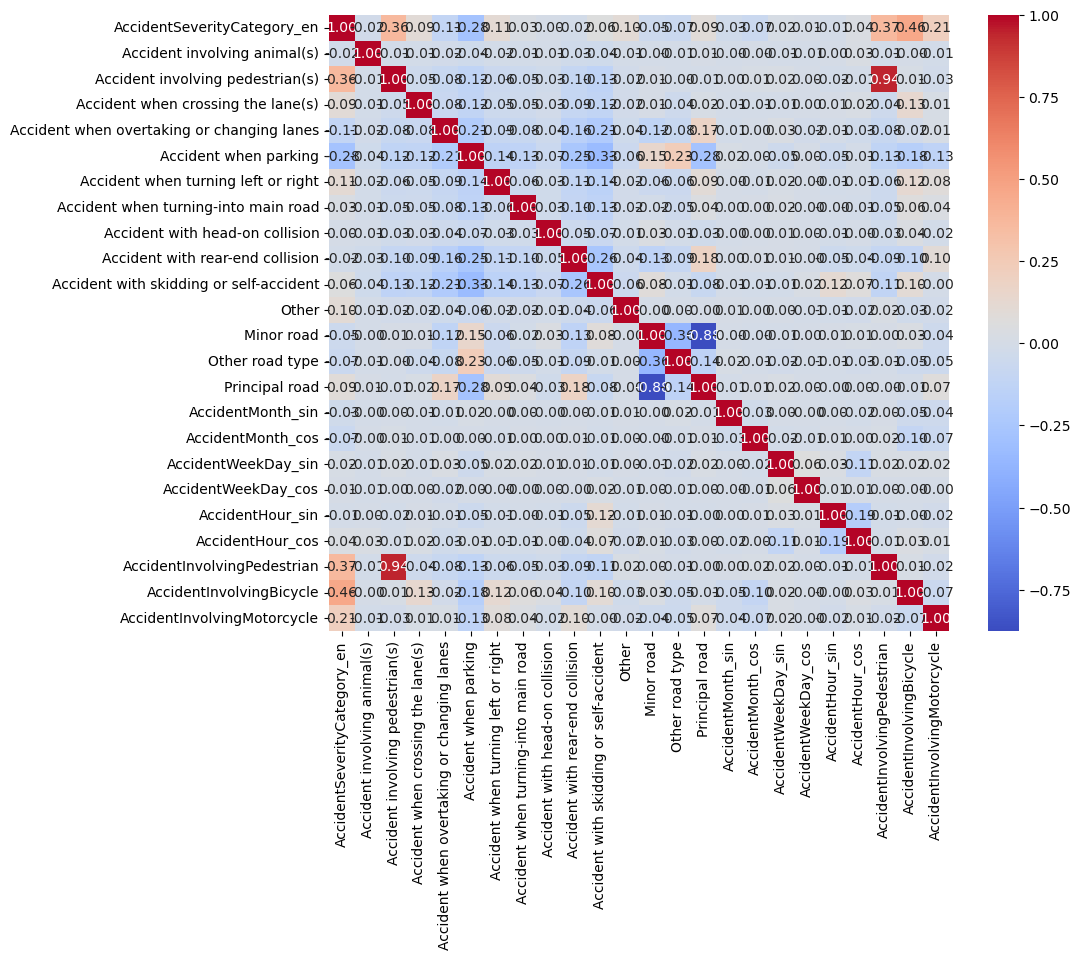

In [25]:
correlation_matrix = data_transformed.corr()
# print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


After transforming the data to numeric values the correlation plot can provide a first insight. It can be stated that there is a slight  correlateion between the target and Accident involving pedestrisan(s) as welle as involving bicycles and motorcicles. All other features have a low correlation near to zero varying from -0.2 to +0.2. 


# 3. Modelling 


## 3.1 Ensemble with voting

In [26]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf_SVC = SVC() 
clf_kNN = KNeighborsClassifier() 
clf_RF = RandomForestClassifier()

estimators=[('SVC', clf_SVC), ('kNN', clf_kNN), ('RF', clf_RF)]

voting_clf = VotingClassifier(
    estimators=estimators,
    voting='hard'
)

In [29]:
data_transformed.head()

,AccidentSeverityCategory_en,Accident involving animal(s),Accident involving pedestrian(s),Accident when crossing the lane(s),Accident when overtaking or changing lanes,Accident when parking,Accident when turning left or right,Accident when turning-into main road,Accident with head-on collision,Accident with rear-end collision,...,Principal road,AccidentMonth_sin,AccidentMonth_cos,AccidentWeekDay_sin,AccidentWeekDay_cos,AccidentHour_sin,AccidentHour_cos,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,-0.433884,-0.900969,0.866025,-0.500000,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,-0.974928,-0.222521,-0.965926,-0.258819,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,0.433884,-0.900969,0.500000,-0.866025,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.5,0.866025,0.433884,-0.900969,-0.258819,-0.965926,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,0.974928,-0.222521,0.500000,-0.866025,0,0,0


In [27]:
# Preparing Trainig and Test dataframes

from sklearn.model_selection import train_test_split

predictors = data_transformed.drop(columns=['AccidentSeverityCategory_en'])
target = data_transformed['AccidentSeverityCategory_en']

# Assuming X and y are your feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

Scaling is unnecessary, since all data is either binary or scaled between -1 and 1 (trigonometric encoding).

Moreover, since we aren't interested in predicting trends or time-series based analysis (and simply want to use the time information to classify a given case), we can use the standard train-test split, rather than a time series split.

In [30]:
# Training and predicting the voting ensemble

from sklearn.metrics import accuracy_score

voting_clf.fit(X_train,y_train)
y_pred = voting_clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("voting Accuracy: %.3f" % accuracy_score(y_test , y_pred))

#previous 0.290
#new: 0.830

voting Accuracy: 0.831


In [31]:
# How do the single estimators perform?

for clf_name, clf in estimators:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("%3s Accuracy: %.3f" % (clf_name,accuracy_score(y_test , y_pred)))

#Previous:
# SVC: 0.327
# kNN: 0.247
# RF:  0.287

#new:
# SVC: 0.843
# kNN: 0.813
# RF:  0.810

SVC Accuracy: 0.843
kNN Accuracy: 0.813
 RF Accuracy: 0.808


It is very likely, that this accuracy does not reflect a well fitted model. Rather, this is probably due to the imbalance of the dataset regarding the number of observations for each target class.

### 3.1.1 Calculating Balanced Accuracy

In [32]:
from sklearn.model_selection import cross_validate

def performance(clf, preds, targets):
    ret = cross_validate(clf, preds, targets, scoring=["accuracy", "balanced_accuracy"])

    print("accuracy=%.2f; balanced accuracy=%.2f" % (ret['test_accuracy'].mean(), ret["test_balanced_accuracy"].mean()))

In [33]:
performance(voting_clf, predictors, target)

accuracy=0.83; balanced accuracy=0.39


As we can see, the balanced accuracy is lower than the unbalanced one, indicating that 

In [37]:
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.89      0.92      0.66      0.90      0.78      0.62     13639
        1.0       0.57      0.57      0.89      0.57      0.71      0.49      3873
        2.0       0.23      0.11      0.98      0.15      0.34      0.10       771
        3.0       0.00      0.00      1.00      0.00      0.00      0.00        35

avg / total       0.79      0.81      0.72      0.80      0.74      0.57     18318



In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90     13639
         1.0       0.57      0.57      0.57      3873
         2.0       0.23      0.11      0.15       771
         3.0       0.00      0.00      0.00        35

    accuracy                           0.81     18318
   macro avg       0.42      0.40      0.41     18318
weighted avg       0.79      0.81      0.80     18318



While classification reports show good model performance for some classes, we can also see, that the minority class 3.0 (accidents so severe they led to fatalities) was never predicted (and thus has no reporting on it). This clearly shows, that the dataset needs to be balanced and stratified sampling should be used. Moreover, balanced accuracy reveals severe problems when accounting for accuracy by class.

Having fit this initial naive model, we will now try to improve it by selecting only the relevant features, balancing the dataset, applying regularization and tuning the hyperparameters.

## 3.2 Feature Selection by Feature Importance

C:\Users\lucah\AppData\Local\Temp\ipykernel_5308\806864431.py:34: RuntimeWarning: invalid value encountered in divide
  plt.bar(X.columns, feature_importance/feature_importance_std)


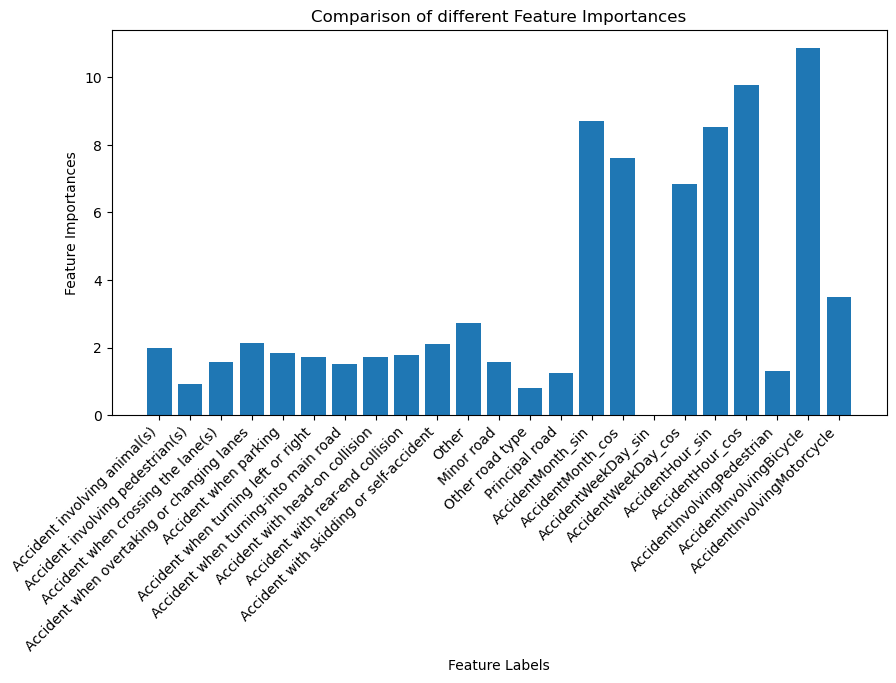

In [39]:
# Load libraries
from sklearn.ensemble import ExtraTreesClassifier

  
# Create features and target
X = predictors
y = target


# Convert to categorical data by converting data to integers
X = X.astype(int)
 
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 50,
                                         criterion ='entropy', 
                                         max_features = 'sqrt',
                                        random_state = 42)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_std = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

feature_importance, feature_importance_std

# Plotting a Bar Graph to compare the models
plt.rcParams["figure.figsize"] = (10,5)
plt.bar(X.columns, feature_importance/feature_importance_std)
plt.xlabel('Feature Labels')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances');


Of consistent importance seem accident month, accident day and accident hour, as well as whether bicycles or motorcycles were involved.

Taken together with the correlation matrix, we will keep the "involvement" categories of pedestrians, bicycles and motorcycles, as well as the time-related features.

In [28]:
predictors_new = data_transformed[['AccidentMonth_sin', 'AccidentMonth_cos', 'AccidentWeekDay_sin', 'AccidentWeekDay_cos', 
                                   'AccidentHour_sin', 'AccidentHour_cos', 'AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle',
                                   'AccidentInvolvingMotorcycle']]
predictors_new

,AccidentMonth_sin,AccidentMonth_cos,AccidentWeekDay_sin,AccidentWeekDay_cos,AccidentHour_sin,AccidentHour_cos,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle
0,5.000000e-01,0.866025,-0.433884,-0.900969,0.866025,-5.000000e-01,0,0,0
1,5.000000e-01,0.866025,-0.974928,-0.222521,-0.965926,-2.588190e-01,0,0,0
2,5.000000e-01,0.866025,0.433884,-0.900969,0.500000,-8.660254e-01,0,0,0
3,5.000000e-01,0.866025,0.433884,-0.900969,-0.258819,-9.659258e-01,0,0,0
4,5.000000e-01,0.866025,0.974928,-0.222521,0.500000,-8.660254e-01,0,0,0
...,...,...,...,...,...,...,...,...,...
61053,5.000000e-01,-0.866025,0.781831,0.623490,1.000000,6.123234e-17,0,0,0
61054,1.224647e-16,-1.000000,0.781831,0.623490,-1.000000,-1.836970e-16,0,0,0
61055,8.660254e-01,-0.500000,-0.781831,0.623490,-0.965926,-2.588190e-01,0,0,0
61056,1.224647e-16,-1.000000,0.433884,-0.900969,-1.000000,-1.836970e-16,0,0,0


### 3.2.1 Balancing the Data

In [29]:
# Weighing the classes in SVC and RF classifiers, using soft voting

clf_SVC_balanced = SVC(class_weight='balanced', probability=True) 
clf_kNN = KNeighborsClassifier() 
clf_RF_balanced = RandomForestClassifier(class_weight='balanced')

estimators_bl=[('SVC_bl', clf_SVC_balanced), ('kNN', clf_kNN), ('RF_bl', clf_RF_balanced)]

voting_clf_bl = VotingClassifier(
    estimators=estimators_bl,
    voting='soft'
)

In [73]:
# Splitting the data still preserving the frequencies of the target with stratify

X_train, X_test, y_train, y_test = train_test_split(predictors_new, target, stratify = target, test_size=0.3, random_state=42)

In [32]:
y_train.value_counts()

AccidentSeverityCategory_en
0.0    31788
1.0     9133
2.0     1769
3.0       50
Name: count, dtype: int64

In [36]:
# Training and predicting the voting ensemble, now using weighted estimators

voting_clf_bl.fit(X_train,y_train)
y_pred = voting_clf_bl.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("voting Accuracy: %.3f" % accuracy_score(y_test , y_pred))

#previous 0.290
#new - naive: 0.830
#new - balanced using class weights: 0.799
#new - balanced using class weights, soft voting: 0.826

voting Accuracy: 0.826


In [37]:
test_accuracy = accuracy_score(y_test, y_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print("Test set accuracy=%.2f; Test set balanced accuracy=%.2f" % (test_accuracy, test_balanced_accuracy))

Test set accuracy=0.83; Test set balanced accuracy=0.39


In [45]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.89      0.94      0.65      0.91      0.78      0.63     13629
        1.0       0.62      0.59      0.90      0.60      0.73      0.51      3902
        2.0       0.17      0.04      0.99      0.07      0.21      0.04       762
        3.0       0.00      0.00      1.00      0.00      0.00      0.00        25

avg / total       0.80      0.83      0.72      0.81      0.75      0.58     18318



Also assessing a majority-undersampling approach

In [29]:
# Undersampling overrepresented classes.
from imblearn.under_sampling import RandomUnderSampler

# Considering the new selection of predictive features
X_train, X_test, y_train, y_test = train_test_split(predictors_new, target, stratify = target, test_size=0.3, random_state=42)

# Undersampling the majority class
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [72]:
y_resampled.value_counts()

AccidentSeverityCategory_en
0.0    60
1.0    60
2.0    60
3.0    60
Name: count, dtype: int64

In [73]:
# Also using classifiers which consider class weights

voting_clf_bl.fit(X_resampled,y_resampled)
y_pred = voting_clf_bl.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("voting Accuracy: %.3f" % accuracy_score(y_test , y_pred))

#previous 0.290
#new - naive: 0.830
#new - balanced, soft (Majority Undersampling): 0.673 - but very quick!

voting Accuracy: 0.677


In [74]:
test_accuracy = accuracy_score(y_test, y_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print("Test set accuracy=%.2f; Test set balanced accuracy=%.2f" % (test_accuracy, test_balanced_accuracy))

Test set accuracy=0.68; Test set balanced accuracy=0.45


In [48]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.89      0.82      0.71      0.85      0.76      0.58     13629
        1.0       0.55      0.28      0.94      0.37      0.51      0.24      3902
        2.0       0.11      0.23      0.92      0.15      0.47      0.20       762
        3.0       0.01      0.52      0.88      0.01      0.67      0.44        25

avg / total       0.78      0.68      0.76      0.72      0.69      0.49     18318



In [133]:
# Using a SMOTE approach to synthesize underrepresented classes

from imblearn.over_sampling import SMOTE 

# Considering the new selection of predictive features
X_train, X_test, y_train, y_test = train_test_split(predictors_new, target,  stratify = target, test_size=0.3, random_state=42)

# Oversampling the minority class
smote = SMOTE() 
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [77]:
y_train_res.value_counts()

AccidentSeverityCategory_en
3.0    22259
1.0    22259
2.0    22258
0.0    22258
Name: count, dtype: int64

In [83]:
# Training and predicting the voting ensemble

voting_clf_bl.fit(X_resampled,y_resampled)
y_pred = voting_clf_bl.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("voting Accuracy: %.3f" % accuracy_score(y_test , y_pred))

#previous 0.290
#new - naive: 0.830
#new - balanced, soft (SMOTE) - class weights: 0.808

voting Accuracy: 0.808


In [84]:
test_accuracy = accuracy_score(y_test, y_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print("Test set accuracy=%.2f; Test set balanced accuracy=%.2f" % (test_accuracy, test_balanced_accuracy))

Test set accuracy=0.81; Test set balanced accuracy=0.41


In [85]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.89      0.93      0.67      0.91      0.79      0.64     13629
        1.0       0.62      0.49      0.92      0.55      0.67      0.43      3902
        2.0       0.18      0.20      0.96      0.19      0.44      0.18       762
        3.0       0.00      0.00      1.00      0.00      0.00      0.00        25

avg / total       0.80      0.81      0.73      0.80      0.75      0.58     18318




We assessed three ways of dealing with class imbalances. Using balanced classifiers, undersampling and SMOTE oversampling. Though balanced accuracy performance of all of these approaches was less than ideal and not as good as expected, the undersampling approach actually achieved the best results. The crux of the matter is, that the class imbalance is extremely severe, from over 13000 observations for class 0 (property damage) to only 25 observations of class 3 (fatalities) in the test set. 
With so little data to go on, SMOTE-oversampling is unlikely to capture the true signal (if it does exist) that binds the observations of class 3 together. On the other hand, while undersampling does include every single item of class 3, a lot of data of the other classes is neglected, which is also suboptimal. 

We went through the whole process with SMOTE oversampling at first, before we realized a mistake we were making, namely that our assessments were based on the validation set, not the actual test set. Due to the large number of observations (over 22000 per class!), this took very long and it is a shame to discard all this effort, but in the end, undersampling gave a better chance at actually fitting a model that can predict the minority classes. The train-test-split code that had produced those erroneous validation sets has now been removed and is no longer present in this jupyter notebook.

Instead, we shall briefly describe our experience with the attempt of tuning, fitting and evaluating the model based on SMOTE oversampled data.


## 3.3 SMOTE Overfitting - Attempted and discarded

The workflow we settled on, after evaluating the strategies for dealing with imbalances was to first tune hyperparameters, then evaluate various model performance characteristics, including but not limited to learning curves.

The hyperparameter tuning step was simultaneously used to regularize the model and prevent overfitting. 
To achieve this, we constructed a custom scoring function which, rather than evaluating each hyperparameter combination for accuracy, considered ROC and Precision-Recall AUC. Using these measures instead should help reduce overfitting. In the SMOTE approach, this did not work so well, as one can tell by the deep trees and large C value for instance, both of which rather promote overfitting (see below).

The Precision-Recall curve takes precision (TP/TP+FP) vs recall (TP/FN+TP) values for different threshold values. The AUC thereof represents the average precision across different recall levels. A high PR AUC indicates high precision and recall, meaning the model correctly finds true positives, while false positives are punished. It focuses on detecting positive instances.

The Receiver Operating Characteristic Curve on the other hand takes recall vs false positive rate (FP/FP+TN) into consideration. A high ROC AUC value (closer to 1 than 0.5), means the model found a good trade-off between true and false positives and measures the overall ability to distinguish between classes, while balancing sensitivity and specificity. In our specific case, we chose "one vs one" comparisons, meaning the ROC AUC is assessed for a comparison of each class-pair.

The parameter values we tested were quite extensive, in order to keep the tuning process feasible, we used a random grid search on a partial dataset (only 5% the size of the full oversampled data) and found the following ideal parameters and crossvalidation scores:


Fitting 3 folds for each of 200 candidates, totalling 600 fits 

Best Hyperparameters: {'svc__kernel': 'poly', 'svc__gamma': 0.1, 'svc__degree': 5, 'svc__coef0': 1.0, 'svc__C': 100, 'rf__n_estimators': 100, 'rf__min_samples_split': 10, 'rf__min_samples_leaf': 1, 'rf__max_features': 0.75, 'rf__max_depth': 20, 'rf__bootstrap': False, 'knn__weights': 'distance', 'knn__p': 2, 'knn__n_neighbors': 7, 'knn__leaf_size': 50, 'knn__algorithm': 'kd_tree'} 

Best Cross-Validation Score: 0.8019578564832393


Notably, we used a k-fold crossvalidation due to the imbalanced (though corrected) nature of the data.

After catching our mistake about testing the final model on the validation data, rather than the test data, we found that this approach only resulted in a balanced accuracy of 0.4 (accuracy 0.81), which we were unhappy with.

Moreover, this approach yielded an F1 score of 0.706, a ROC AUC score of 0.671 and a precision recall curve AUC score of 0.340.

This sub-optimal performance was compounded by other metrics, such as the associated confusion matrix. Classes 0 (property damage) and 1 (light injuries) had more than 50% correct classifications, but class 2 (heavy injuries) and class 3 (fatalities) actually had fewer predicted entries in correct classes than in the incorrct ones, indicating very poor model fit.

We did see decent performance of our model in terms of ROC AUC for OvR and OVO discrimination, but limited ROC AUC values per class individually, especially for class 3 (fatalities), where the model failed to rise above random prediction.

Last but not least, we also evaluated the learning curves of this model, where we found that additional data likely would not have improved the performance any further. Additionally, we found that our model exhibited low bias, but large variance. This is consistent with the problems we had encountered and indicates that the model is not generalizing well. The large dataset of artificial data likely contained a lot of noise that did not aid in determining true relationships and contributed to this variance. On the other hand, the equal group sizes and the aforementioned noise were likely the main reason for the low bias. 

Because of these issues and an initially erroneous approach in evaluating the performance of the SMOTE dataset, we repeated our analysis with undersampling instead of oversampling.






## 3.4 Undersampling approach

### 3.4.1 Creating Undersampled Dataset

In [30]:
# Considering the new selection of predictive features
X_train, X_test, y_train, y_test = train_test_split(predictors_new, target, stratify = target, test_size=0.3, random_state=42)

# Undersampling the majority class
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [31]:
X_resampled

,AccidentMonth_sin,AccidentMonth_cos,AccidentWeekDay_sin,AccidentWeekDay_cos,AccidentHour_sin,AccidentHour_cos,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle
46186,0.866025,-5.000000e-01,-0.781831,0.623490,0.707107,-0.707107,0,0,0
5391,0.500000,-8.660254e-01,-0.974928,-0.222521,-0.707107,-0.707107,0,0,0
44346,-0.866025,5.000000e-01,0.781831,0.623490,-0.866025,-0.500000,0,0,0
61023,-0.866025,5.000000e-01,0.433884,-0.900969,-0.500000,-0.866025,0,0,0
20638,-1.000000,-1.836970e-16,0.433884,-0.900969,-0.965926,0.258819,0,0,0
...,...,...,...,...,...,...,...,...,...
16896,0.866025,5.000000e-01,0.000000,1.000000,0.500000,-0.866025,1,0,0
5514,-0.866025,-5.000000e-01,0.974928,-0.222521,-0.866025,-0.500000,1,0,0
60540,1.000000,6.123234e-17,0.781831,0.623490,0.500000,-0.866025,0,0,0
1352,-0.866025,5.000000e-01,-0.781831,0.623490,0.866025,-0.500000,0,0,1


In [32]:
y_resampled.value_counts()

AccidentSeverityCategory_en
0.0    60
1.0    60
2.0    60
3.0    60
Name: count, dtype: int64

### 3.4.2 Tuning Hyperparameters for Undersampled Dataset

In [36]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, average_precision_score

In [109]:

clf_SVC_balanced = SVC(class_weight='balanced', probability=True) 
clf_kNN = KNeighborsClassifier() 
clf_RF_balanced = RandomForestClassifier(class_weight='balanced')

estimators_bl=[('svc', clf_SVC_balanced), ('knn', clf_kNN), ('rf', clf_RF_balanced)]

voting_clf_bl = VotingClassifier(
    estimators=estimators_bl,
    voting='soft'
)

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # maintaining specific class distributions

param_grid = { 
    'svc__C': [0.1, 1, 10, 100], 
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], 
    'svc__degree': [2, 3, 4, 5], 
    'svc__coef0': [0.0, 0.1, 0.5, 1.0],
    'rf__n_estimators': [100, 200, 500], 
    'rf__max_depth': [None, 10, 20, 30], 
    'rf__min_samples_split': [2, 10, 15], 
    'rf__max_features': ['sqrt', 'log2', None, 0.5, 0.75, 5, 10], 
    'rf__min_samples_leaf': [1, 2, 4, 6], 
    'rf__bootstrap': [True, False], 
    'knn__n_neighbors': [3, 5, 7, 9], 
    'knn__weights': ['uniform', 'distance'], 
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'knn__leaf_size': [20, 30, 40, 50], 
    'knn__p': [1, 2]
}

# Making a custom scorer to optimize ROC AUC and precision

def custom_scorer(y_true, y_proba_pred):
    try:
        roc_auc = roc_auc_score(y_true, y_proba_pred, multi_class='ovo')
        pr_auc = average_precision_score(y_true, y_proba_pred, average='weighted')
        combined_score = 0.5 * roc_auc + 0.5 * pr_auc
        if np.isnan(combined_score):
            print(f"NaN detected in combined_score: roc_auc={roc_auc}, pr_auc={pr_auc}")
        return combined_score
    except Exception as e:
        print(f"Error in custom_scorer: {e}")
        return np.nan


custom_scorer_fn = make_scorer(custom_scorer, response_method='predict_proba')


random_search_undersample = RandomizedSearchCV(estimator=voting_clf_bl,
                                   param_distributions=param_grid,
                                   n_iter=100,  # Number of parameter settings sampled
                                   cv=stratified_cv,
                                   scoring=custom_scorer_fn,
                                   n_jobs=-1,
                                   verbose=2,
                                   random_state=42)

random_search_undersample.fit(X_resampled, y_resampled)

# Best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search_undersample.best_params_)
print("Best Cross-Validation Score: ", random_search_undersample.best_score_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters:  {'svc__kernel': 'linear', 'svc__gamma': 1, 'svc__degree': 2, 'svc__coef0': 1.0, 'svc__C': 0.1, 'rf__n_estimators': 200, 'rf__min_samples_split': 10, 'rf__min_samples_leaf': 4, 'rf__max_features': 10, 'rf__max_depth': 10, 'rf__bootstrap': True, 'knn__weights': 'uniform', 'knn__p': 2, 'knn__n_neighbors': 9, 'knn__leaf_size': 20, 'knn__algorithm': 'ball_tree'}
Best Cross-Validation Score:  0.6290754971816909


In [33]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Results from the previous cell were used to initalisze the bese classifiers. It is possible that if ran again, the results will be different. 
# Initialize the base classifiers with the best hyperparameters
clf_SVC_balanced = SVC(
    kernel='linear', 
    gamma=1, 
    degree=2, 
    coef0=1.0, 
    C=0.1, 
    class_weight='balanced', 
    probability=True
)

clf_kNN = KNeighborsClassifier(
    weights='uniform', 
    p=2, 
    n_neighbors=9, 
    leaf_size=20, 
    algorithm='ball_tree'
)

clf_RF_balanced = RandomForestClassifier(
    n_estimators=200, 
    min_samples_split=10, 
    min_samples_leaf=4, 
    max_features=10, 
    max_depth=10, 
    bootstrap=True, 
    class_weight='balanced'
)

# Combine the classifiers into a voting classifier
estimators_bl = [
    ('svc', clf_SVC_balanced), 
    ('knn', clf_kNN),
    ('rf', clf_RF_balanced)
]

best_voting_clf_us = VotingClassifier(
    estimators=estimators_bl, 
    voting='soft'
)


In [34]:

# Use the best estimator
# Best_voting_clf_us = random_search_undersample.best_estimator_¨
# Commented line above is used to use the best estimator from the RandomizedSearchCV 
best_voting_clf_us.fit(X_resampled,y_resampled)



VotingClassifier(estimators=[('svc',
                              SVC(C=0.1, class_weight='balanced', coef0=1.0,
                                  degree=2, gamma=1, kernel='linear',
                                  probability=True)),
                             ('knn',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   leaf_size=20,
                                                   n_neighbors=9)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=10,
                                                     max_features=10,
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_estimators=200))],
                 voting='soft')

In [40]:
from sklearn.metrics import balanced_accuracy_score

test_pred_us = best_voting_clf_us.predict(X_test)
test_accuracy_us = accuracy_score(y_test, test_pred_us)
test_balanced_accuracy_us = balanced_accuracy_score(y_test, test_pred_us)

print("Test set accuracy=%.2f; Test set balanced accuracy=%.2f" % (test_accuracy_us, test_balanced_accuracy_us))

Test set accuracy=0.75; Test set balanced accuracy=0.52


In [42]:
from sklearn.metrics import f1_score

f1_score(y_test, test_pred_us, average='weighted')

np.float64(0.7622401805410757)

In [45]:
from sklearn.metrics import roc_auc_score

y_pred_proba_us = best_voting_clf_us.predict_proba(X_test)

#ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba_us, multi_class='ovo') 
print("ROC AUC Score on Test Set: %.3f" % roc_auc)

ROC AUC Score on Test Set: 0.693


In [46]:
# Precision-Recall Curve AUC Score
pr_auc = average_precision_score(y_test, y_pred_proba_us)

print("Precision Recall Curve AUC Score on Test Set: %.3f" % pr_auc)

Precision Recall Curve AUC Score on Test Set: 0.369


In [49]:
print(classification_report_imbalanced(y_test, test_pred_us))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.89      0.92      0.69      0.91      0.79      0.65     13629
        1.0       0.64      0.26      0.96      0.37      0.50      0.24      3902
        2.0       0.13      0.28      0.92      0.18      0.51      0.24       762
        3.0       0.01      0.60      0.94      0.03      0.75      0.55        25

avg / total       0.81      0.75      0.75      0.76      0.72      0.54     18318



In [50]:
print(classification_report(y_test, test_pred_us))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91     13629
         1.0       0.64      0.26      0.37      3902
         2.0       0.13      0.28      0.18       762
         3.0       0.01      0.60      0.03        25

    accuracy                           0.75     18318
   macro avg       0.42      0.52      0.37     18318
weighted avg       0.81      0.75      0.76     18318



Finally we can conclude our second and final hyperparameter tuning. We again investigated various parameters of the SVC classifier, the random forest classifier and the kNN classifier. 

As mentioned previously, we used a custom scoring function, which evaluated the various parameter options based on PR AUC and ROC AUC values, weighting the two measures equally. This was done to prevent overfitting, which seems to have worked, given the low SVC C value and linear kernel, the small min sample split and leaves of the random forest classifier as well as the limited depth. Generally, our model parameters are well suited for a generalized model.

This is vindicated by better evaluation statistics compared to the original smote approach across the board. We're particularly happy about the ten percent increase in weighted accuracy from 40% to 51%.


# 4. Model Evaluation - Final Undersampling Approach

## 4.1 Confusion Matrix

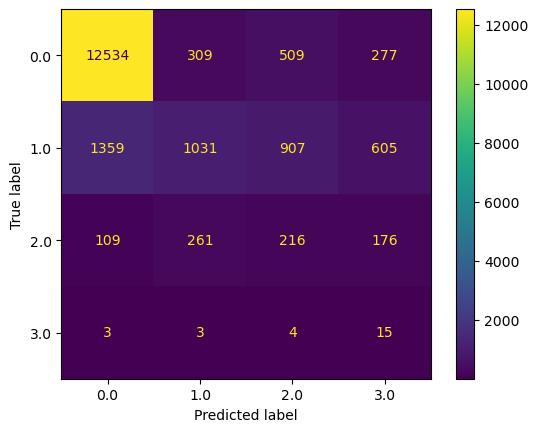

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, test_pred_us, labels=best_voting_clf_us.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_voting_clf_us.classes_)
disp.plot(); 

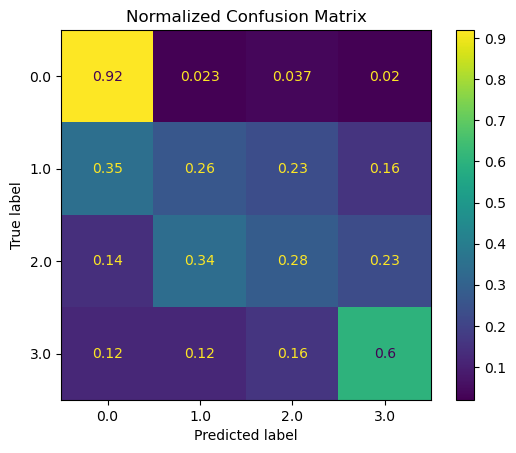

In [53]:
# Normalize by actual counts for each class (row-wise normalization)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Display the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized,
                              display_labels=best_voting_clf_us.classes_)
disp.plot(cmap='viridis')  # You can use different colormaps, such as 'viridis', 'plasma', 'inferno', etc.
plt.title('Normalized Confusion Matrix')
plt.show()


The analysis shows that the model’s performance has improved in some areas but still faces challenges. The current predictors, such as time variables and involvement categories, do not fully capture the complexity of accident severity, leaving some variability unexplained. 

Class 0 ("property damage") is well-defined and performs the best, which suggests it is relatively straightforward to classify. However, Class 1 ("light injuries") performs worse compared to the SMOTE-based model, with more instances of Class 0 being misclassified as Class 1. For Class 2 ("heavy injuries"), there is some improvement over the SMOTE-based model, but confusion with Class 1 remains an issue. The biggest improvement is seen in Class 3 ("fatalities"), where most observations are now correctly classified, compared to none in the previous model.

Overall, the model is better at predicting property damage and fatalities than injuries. This makes sense, as accidents without the involvement of pedestrians, cyclists, or motorcyclists are less likely to result in injuries. While the results are still far from ideal, they show progress compared to the SMOTE-based model. However, further work is needed to improve predictions for injury severity, possibly by adding more relevant features or refining the existing predictors.

## 4.2 ROC Curve

In [54]:
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test)) 
n_classes = y_test_bin.shape[1]


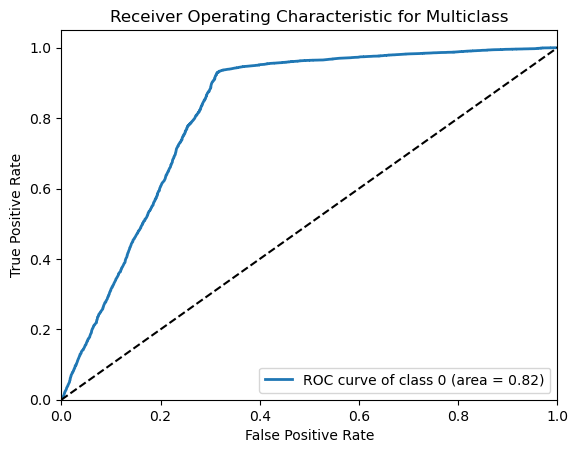

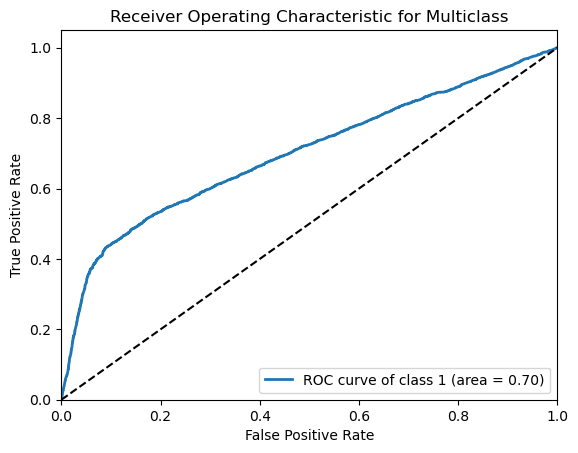

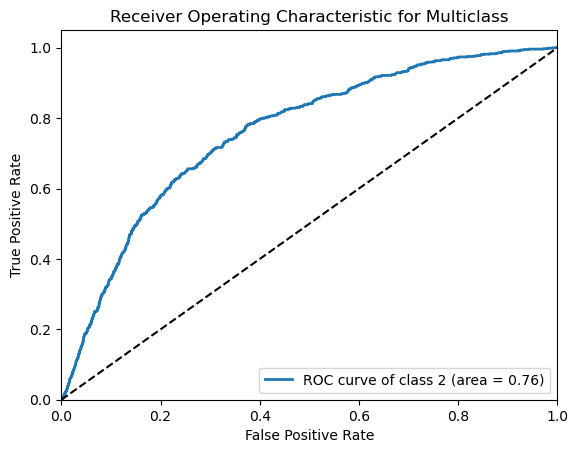

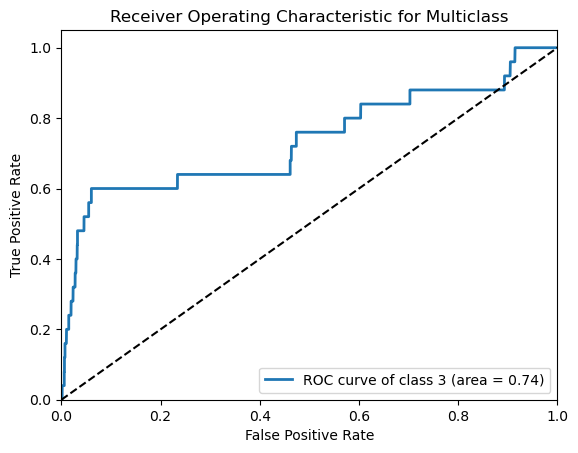

In [55]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from itertools import cycle


#fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute ROC curve and ROC area for each class 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 

for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], [score[i] for score in y_pred_proba_us]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 

# Plotting 
plt.figure() 
for i in range(n_classes): 
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i])) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.title('Receiver Operating Characteristic for Multiclass') 
    plt.legend(loc="lower right") 
    plt.show()

In [56]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    for j in range(i + 1, n_classes):
        # Extract binary labels and predictions for the pair of classes
        y_test_binary = y_test_bin[:, [i, j]].ravel()
        y_pred_binary = y_pred_proba_us[:, [i, j]].ravel()
        fpr[(i, j)], tpr[(i, j)], _ = roc_curve(y_test_binary, y_pred_binary)
        roc_auc[(i, j)] = auc(fpr[(i, j)], tpr[(i, j)])


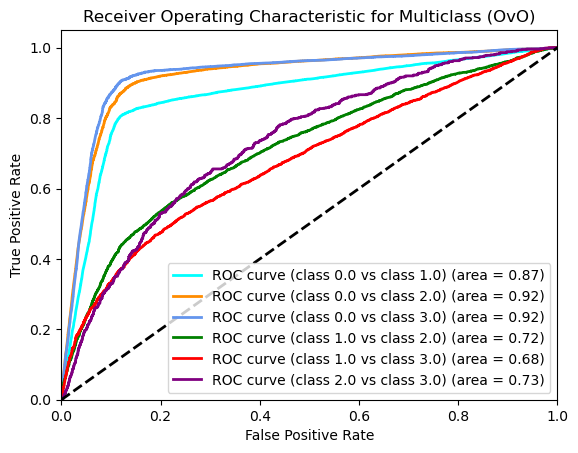

In [57]:
plt.figure()
classes=np.unique(y_test)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink'])

for (i, j), color in zip(fpr.keys(), colors):
    plt.plot(fpr[(i, j)], tpr[(i, j)], color=color, lw=2,
             label=f'ROC curve (class {classes[i]} vs class {classes[j]}) (area = {roc_auc[(i, j)]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass (OvO)')
plt.legend(loc="lower right")
plt.show()


Our model shows decent performance in terms of ROC AUC for both One-vs-Rest (OvR) and One-vs-One (OvO) discrimination. Notably, the OvR curve for Class 3 ("fatalities") has significantly improved, now achieving an AUC of 0.74 compared to barely above 0.5 in the previous model. This demonstrates a much stronger ability to distinguish Class 3 from the others.

The apparent discrepancy between the good ROC AUC results and the less favorable confusion matrix outcomes can be attributed to the differences in evaluation methods. ROC AUC evaluates the model based on its predicted probabilities for each class, providing a nuanced assessment of how well the model can distinguish between classes. In contrast, the confusion matrix evaluates performance using hard classification decisions at a single threshold, which may not fully capture the model’s underlying capabilities.

Moreover, the ROC AUC considers performance across all possible thresholds, offering a more comprehensive view of the model's behavior. This contrasts with the confusion matrix, which focuses only on the default threshold. 

The ROC curve itself plots the true positive rate (TPR) against the false positive rate (FPR), reflecting the model’s ability to rank probabilities correctly. The curves indicate that, while the default threshold may lead to more false assignments in the confusion matrix, the model is still reasonably effective at ranking observations by their likelihood of belonging to each class.

## 4.3 Learning Curve

In [58]:
from sklearn.model_selection import learning_curve
import matplotlib as mpl

def plot_learning_curve(model, X, y):
    cv = 5 # number of cross validation runs
    
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X,
        y,
        cv=cv,
        n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    print("training scores:",train_scores_mean)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.title("Learning curve")
    y_min = np.min(test_scores_mean - test_scores_std)
    plt.ylim((y_min,1))
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, "o-", 
             color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, "o-", 
             color="g", label="Test score (cv=%i)"%cv)
    plt.legend(loc="best")

training scores: [0.85078498 0.84321714 0.83893783 0.83864037 0.83648151]


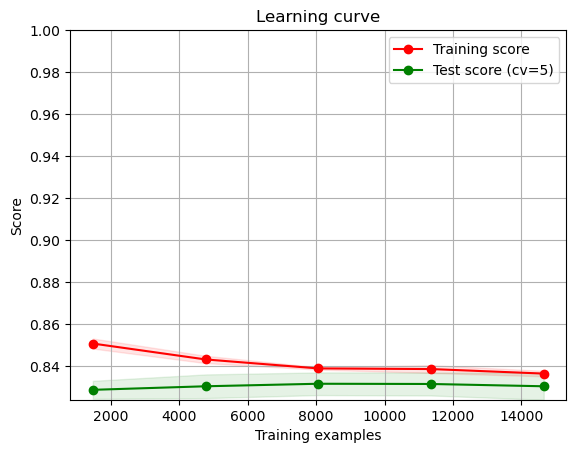

In [59]:
plot_learning_curve(best_voting_clf_us, X_test, y_test)

The undersampling approach provides a final positive takeaway: a very encouraging learning curve. The curve suggests that adding more data would likely not have significantly improved performance. This supports the earlier conclusion that the current predictors may not fully capture all the variance in accident severity.

The learning curve indicates low bias and relatively low variance, suggesting that the model is performing as well as can be expected given the available data and predictors. This highlights that the model is well-balanced and capable of generalizing effectively within the current constraints.

Overall, this model demonstrates superior generalizability compared to the previous SMOTE-based approach, making it a more robust choice for this problem.

## 4.4 Modelling Uncertainty

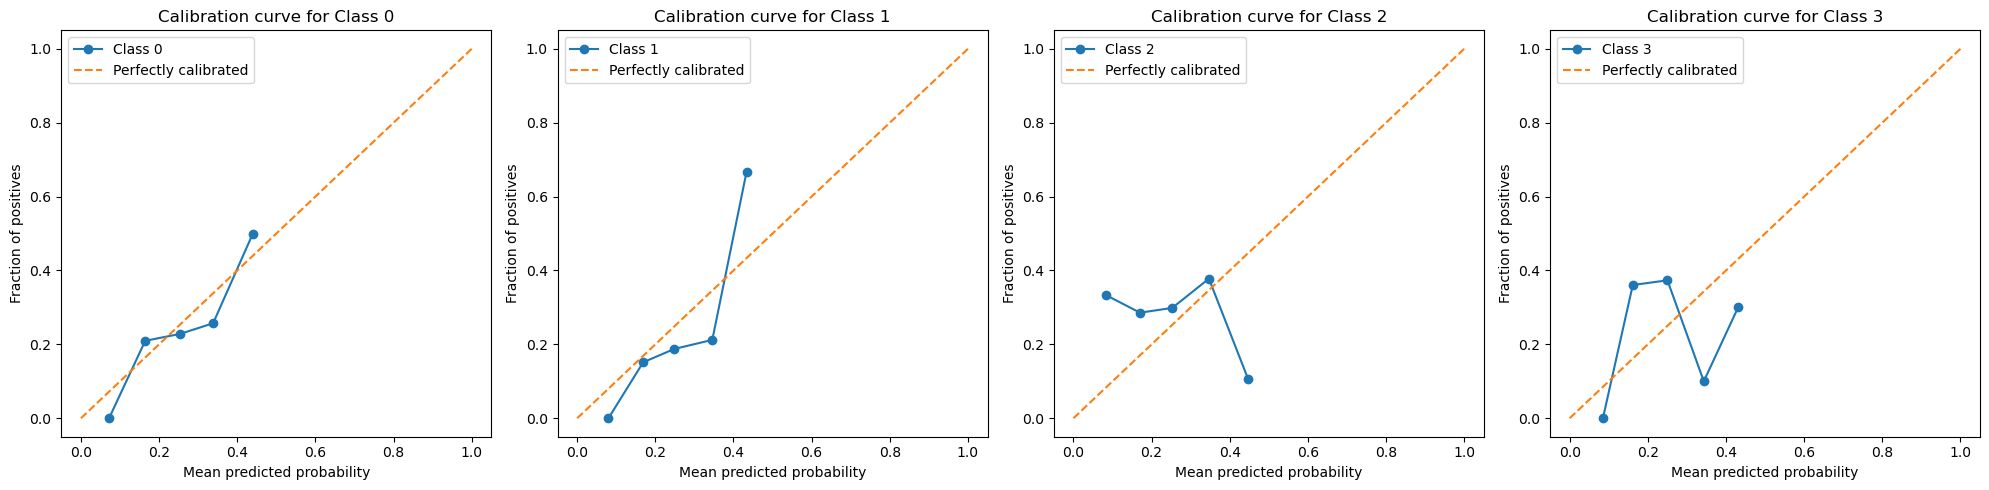

In [60]:
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Generate synthetic data
X = np.random.rand(1000, 10)
y = np.random.randint(0, 4, 1000)  # 4 target classes

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test)

# Plot calibration curve for each class
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i in range(4):
    prob_true, prob_pred = calibration_curve(y_test == i, y_prob[:, i], n_bins=10)
    ax[i].plot(prob_pred, prob_true, marker='o', label=f'Class {i}')
    ax[i].plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
    ax[i].set_xlabel('Mean predicted probability')
    ax[i].set_ylabel('Fraction of positives')
    ax[i].set_title(f'Calibration curve for Class {i}')
    ax[i].legend()

plt.tight_layout()
plt.show()

The calibration curves highlight the ongoing challenges with model fit. For Classes 0 ("property damage") and 1 ("light injuries"), the model is reasonably well-calibrated, with the predicted probabilities closely aligning with the actual fractions of positives. However, the situation is less favorable for Classes 2 ("heavy injuries") and 3 ("fatalities"). 

For these classes, the model exhibits both underconfidence and overconfidence depending on the range of mean predicted probabilities. This indicates that the model’s calibration for these classes is suboptimal, leading to less reliable probability estimates. This misalignment suggests that while the model can provide reasonable predictions for the more prevalent classes, it struggles to accurately quantify uncertainty for the less common and more severe outcomes.

# 5. Conclusion
All in all, the underfitted model seemed to have performed the best and is better suited for the problem we were looking at. 

The model shows improvem,ent in some areas but still faces challenges in others. It performs well for Class 0 and has made improvements for Class 3, with an OvR AUC of 0.74 and better classification overall. However, Classes 1 and 2 remain problematic, with persistent misclassifications and suboptimal calibration. 
The strong ROC AUC scores, especially for Class 3, shows the model's ability to rank probabilities effectively across thresholds, even though the cobfusion matrix shows less favorable results at the default threshold. The learning curve shows that the model is well-balanced, with low bias and variance, and unlikely to benefit from additional data given the current predictors. 
Nonetheless, the calibration issues for Classes 2 and 3 suggest that the models struggles to provide reliable probabilities estimates for less common and severe outcomes. 
Overall, this model demonstrates better generalizability and robustness compared to the SMOTE-based approach. However, further refinement is necessary to achieve more consistent performance across all classes.

# 6. Sources

Chong, M., Abraham, A., & Paprzycki, M. (2005). Traffic accident analysis using machine learning paradigms. Informatica, 29(1), 89–98.

Zürcher Hochschule für Angewandte Wissenschaften (ZHAW). (o.D.). Statistische Analyse von Unfallhäufigkeiten. Retrieved on 21.12.2024, from https://www.zhaw.ch/de/engineering/institute-zentren/idp/forschungsthemen/data-analysis-and-statistics/statistische-analyse-von-unfallhaeufigkeiten/

Aboulola, O. I. (2024). Improving traffic accident severity prediction using MobileNet transfer learning model and SHAP XAI technique. PLoS ONE, 19(4), e0300640.

Sharma, D. K., & Usha, M. (2023). The traffic accident prediction using machine learning. International Research Journal of Modernization in Engineering Technology and Science, 5(7), 1–10.

Behboudi, N., Moosavi, S., & Ramnath, R. (2024). Recent advances in traffic accident analysis and prediction: A comprehensive review of machine learning techniques. Under review.

Hemalatha, M., & Dhuwaraganath, S. (2024). Road accident prediction using machine learning. International Journal of Scientific Research in Science and Technology, 11(2), 454–457.